In [9]:
# !pip install pandas

In [240]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [241]:
import os
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, 'DATA')

In [242]:
columns_df = pd.read_csv(os.path.join(data_dir, 'census-bureau.columns'), sep=',', header=None)
columns_df[0].values

array(['age', 'class of worker', 'detailed industry recode',
       'detailed occupation recode', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'marital stat',
       'major industry code', 'major occupation code', 'race',
       'hispanic origin', 'sex', 'member of a labor union',
       'reason for unemployment', 'full or part time employment stat',
       'capital gains', 'capital losses', 'dividends from stocks',
       'tax filer stat', 'region of previous residence',
       'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household', 'weight',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
   

In [243]:
# renaming columns based on : https://docs.1010data.com/Tutorials/MachineLearningExamples/CensusIncomeDataSet.html

renamed_columns_map = {
  'age' : 'age' ,
  'class of worker' : 'class_worker' ,
  'detailed industry recode' : 'det_ind_code' ,
  'detailed occupation recode' : 'det_occ_code' ,
  'education' : 'education' ,
  'wage per hour' : 'wage_per_hour' ,
  'enroll in edu inst last wk' : 'hs_college' ,
  'marital stat' : 'marital_stat' ,
  'major industry code' : 'major_ind_code' ,
  'major occupation code' : 'major_occ_code' ,
  'race' : 'race' ,
  'hispanic origin' : 'hisp_origin' ,
  'sex' : 'sex' ,
  'member of a labor union' : 'union_member' ,
  'reason for unemployment' : 'unemp_reason' ,
  'full or part time employment stat' : 'full_or_part_emp' ,
  'capital gains' : 'capital_gains' ,
  'capital losses' : 'capital_losses' ,
  'dividends from stocks' : 'stock_dividends' ,
  'tax filer stat' : 'tax_filer_stat' ,
  'region of previous residence' : 'region_prev_res' ,
  'state of previous residence' : 'state_prev_res' ,
  'detailed household and family stat' : 'det_hh_fam_stat' ,
  'detailed household summary in household' : 'det_hh_summ' ,
  'weight' : 'weight' ,
  'migration code-change in msa' : 'mig_chg_msa' ,
  'migration code-change in reg' : 'mig_chg_reg' ,
  'migration code-move within reg' : 'mig_move_reg' ,
  'live in this house 1 year ago' : 'mig_same' ,
  'migration prev res in sunbelt' : 'mig_prev_sunbelt' ,
  'num persons worked for employer' : 'num_emp' ,
  'family members under 18' : 'fam_under_18' ,
  'country of birth father' : 'country_father' ,
  'country of birth mother' : 'country_mother' ,
  'country of birth self' : 'country_self' ,
  'citizenship' : 'citizenship' ,
  'own business or self employed' : 'own_or_self' ,
  "fill inc questionnaire for veteran's admin" : 'vet_question' ,
  'veterans benefits' : 'vet_benefits' ,
  'weeks worked in year' : 'weeks_worked' ,
  'year' : 'year' ,
  'label' : 'income_50k'
}


In [244]:
data_df = pd.read_csv(os.path.join(data_dir, 'census-bureau.data'), sep=',' , header=None)
data_df.columns = columns_df[0].values
# rename columns in-place (assign back to data_df)
data_df = data_df.rename(columns=renamed_columns_map)
data_df.head()

,age,class_worker,det_ind_code,det_occ_code,education,wage_per_hour,hs_college,marital_stat,major_ind_code,major_occ_code,...,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,year,income_50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [246]:
data_df.columns

Index(['age', 'class_worker', 'det_ind_code', 'det_occ_code', 'education',
       'wage_per_hour', 'hs_college', 'marital_stat', 'major_ind_code',
       'major_occ_code', 'race', 'hisp_origin', 'sex', 'union_member',
       'unemp_reason', 'full_or_part_emp', 'capital_gains', 'capital_losses',
       'stock_dividends', 'tax_filer_stat', 'region_prev_res',
       'state_prev_res', 'det_hh_fam_stat', 'det_hh_summ', 'weight',
       'mig_chg_msa', 'mig_chg_reg', 'mig_move_reg', 'mig_same',
       'mig_prev_sunbelt', 'num_emp', 'fam_under_18', 'country_father',
       'country_mother', 'country_self', 'citizenship', 'own_or_self',
       'vet_question', 'vet_benefits', 'weeks_worked', 'year', 'income_50k'],
      dtype='object')

In [255]:
# 1. Count "Not in universe" (case-insensitive) for each column
niu_counts = data_df.apply(
    lambda col: col.astype(str).str.contains('Not in universe', case=False, na=False).sum()
)

# 2. Filter to show only columns that actually contain this value
niu_counts = niu_counts[niu_counts > 0].sort_values(ascending=False)

# 3. Print the results
print("Count of 'Not in universe' records per column:")
print(niu_counts/len(data_df) * 100)  # as percentage of total records


Count of 'Not in universe' records per column:
vet_question        99.005628
unemp_reason        96.957744
hs_college          93.694962
state_prev_res      92.094646
region_prev_res     92.094646
union_member        90.445212
fam_under_18        72.288408
mig_same            50.726984
major_ind_code      50.462353
major_occ_code      50.462353
class_worker        50.242328
mig_prev_sunbelt    42.127474
mig_move_reg         0.759812
mig_chg_msa          0.759812
mig_chg_reg          0.759812
dtype: float64


In [259]:
data_df.drop(columns=['vet_question' , 'unemp_reason' , 'hs_college' , 'state_prev_res' , 'region_prev_res' , 'union_member' , 'fam_under_18'] , inplace=True , axis=1)

In [260]:
data_df['race'].value_counts()

race
White                          167365
Black                           20415
Asian or Pacific Islander        5835
Other                            3657
Amer Indian Aleut or Eskimo      2251
Name: count, dtype: int64

In [262]:
data_df['det_hh_fam_stat'].value_counts() , data_df['det_hh_summ'].value_counts()
# det_hh_fam_stat will be dropped and det_hh_summ will be considered

(det_hh_fam_stat
 Householder                                        53248
 Child <18 never marr not in subfamily              50326
 Spouse of householder                              41695
 Nonfamily householder                              22213
 Child 18+ never marr Not in a subfamily            12030
 Secondary individual                                6122
 Other Rel 18+ ever marr not in subfamily            1956
 Grandchild <18 never marr child of subfamily RP     1868
 Other Rel 18+ never marr not in subfamily           1728
 Grandchild <18 never marr not in subfamily          1066
 Child 18+ ever marr Not in a subfamily              1013
 Child under 18 of RP of unrel subfamily              732
 RP of unrelated subfamily                            685
 Child 18+ ever marr RP of subfamily                  671
 Other Rel <18 never marr child of subfamily RP       656
 Other Rel 18+ ever marr RP of subfamily              656
 Other Rel 18+ spouse of subfamily RP                 6

In [266]:
data_df.drop(['det_hh_fam_stat'] , inplace=True , axis=1)

KeyError: "['det_hh_fam_stat'] not found in axis"

In [ ]:
data_df['mig_chg_msa'].value_counts() , data_df['mig_chg_reg'].value_counts() , data_df['mig_move_reg'].value_counts() , data_df['mig_same'].value_counts() , data_df['mig_prev_sunbelt'].value_counts() # provide no significant information

(mig_chg_msa
 ?                   99696
 Nonmover            82538
 MSA to MSA          10601
 NonMSA to nonMSA     2811
 Not in universe      1516
 MSA to nonMSA         790
 NonMSA to MSA         615
 Abroad to MSA         453
 Not identifiable      430
 Abroad to nonMSA       73
 Name: count, dtype: int64,
 mig_chg_reg
 ?                                 99696
 Nonmover                          82538
 Same county                        9812
 Different county same state        2797
 Not in universe                    1516
 Different region                   1178
 Different state same division       991
 Abroad                              530
 Different division same region      465
 Name: count, dtype: int64,
 mig_move_reg
 ?                               99696
 Nonmover                        82538
 Same county                      9812
 Different county same state      2797
 Not in universe                  1516
 Different state in South          973
 Different state in West       

In [267]:
data_df.drop(['mig_chg_msa' , 'mig_chg_reg' , 'mig_move_reg' , 'mig_same' , 'mig_prev_sunbelt']   , inplace=True , axis=1)

In [269]:
data_df.columns

Index(['age', 'class_worker', 'det_ind_code', 'det_occ_code', 'education',
       'wage_per_hour', 'marital_stat', 'major_ind_code', 'major_occ_code',
       'race', 'hisp_origin', 'sex', 'full_or_part_emp', 'capital_gains',
       'capital_losses', 'stock_dividends', 'tax_filer_stat', 'det_hh_summ',
       'weight', 'num_emp', 'country_father', 'country_mother', 'country_self',
       'citizenship', 'own_or_self', 'vet_benefits', 'weeks_worked', 'year',
       'income_50k'],
      dtype='object')

In [271]:
data_df.drop(['country_father' , 'country_mother' , 'country_self' , 'citizenship']   , inplace=True , axis=1)

In [219]:
data_df['class_worker'].value_counts()

class_worker
Not in universe                   100245
Private                            72028
Self-employed-not incorporated      8445
Local government                    7784
State government                    4227
Self-employed-incorporated          3265
Federal government                  2925
Never worked                         439
Without pay                          165
Name: count, dtype: int64

In [ ]:
data_df['det_ind_code'].value_counts() , data_df['det_occ_code'].value_counts() # high cardinality columns and no significant importance

(det_ind_code
 0     100684
 33     17070
 43      8283
 4       5984
 42      4683
 45      4482
 29      4209
 37      4022
 41      3964
 32      3596
 35      3380
 39      2937
 34      2765
 44      2549
 2       2196
 11      1764
 50      1704
 40      1651
 47      1644
 38      1629
 24      1503
 12      1350
 19      1346
 30      1181
 31      1178
 25      1084
 9        993
 22       952
 36       945
 13       899
 1        827
 48       652
 27       626
 49       610
 3        563
 21       559
 6        554
 5        553
 8        550
 16       539
 23       525
 18       483
 15       452
 7        422
 14       295
 46       187
 17       157
 28       143
 26       127
 51        36
 20        32
 10         4
 Name: count, dtype: int64,
 det_occ_code
 0     100684
 2       8756
 26      7887
 19      5413
 29      5105
 36      4145
 34      4025
 10      3683
 16      3445
 23      3392
 12      3340
 33      3325
 3       3195
 35      3168
 38      3003
 31   

In [272]:
data_df.drop(['det_ind_code' , 'det_occ_code']   , inplace=True , axis=1)

In [273]:
data_df['major_ind_code'].value_counts() , data_df['major_occ_code'].value_counts() # Meaningful columns

(major_ind_code
 Not in universe or children            100684
 Retail trade                            17070
 Manufacturing-durable goods              9015
 Education                                8283
 Manufacturing-nondurable goods           6897
 Finance insurance and real estate        6145
 Construction                             5984
 Business and repair services             5651
 Medical except hospital                  4683
 Public administration                    4610
 Other professional services              4482
 Transportation                           4209
 Hospital services                        3964
 Wholesale trade                          3596
 Agriculture                              3023
 Personal services except private HH      2937
 Social services                          2549
 Entertainment                            1651
 Communications                           1181
 Utilities and sanitary services          1178
 Private household services                9

In [274]:
data_df['wage_per_hour'].value_counts()

wage_per_hour
0       188219
500        734
600        546
700        534
800        507
         ...  
420          1
2288         1
415          1
451          1
978          1
Name: count, Length: 1240, dtype: int64

In [275]:
data_df['capital_gains'].value_counts()

capital_gains
0        192144
15024       788
7688        609
7298        582
99999       390
          ...  
4594          1
2601          1
1140          1
2227          1
8530          1
Name: count, Length: 132, dtype: int64

In [276]:
data_df['capital_losses'].value_counts()

capital_losses
0       195617
1902       407
1977       381
1887       364
1602       193
         ...  
1956         2
1911         1
2519         1
2080         1
155          1
Name: count, Length: 113, dtype: int64

In [277]:
data_df['stock_dividends'].value_counts()

stock_dividends
0        178382
100        1148
500        1030
1000        894
200         866
          ...  
472           1
7555          1
518           1
26000         1
1895          1
Name: count, Length: 1478, dtype: int64

In [278]:
data_df['weeks_worked'].value_counts()

weeks_worked
0     95983
52    70314
40     2790
50     2304
26     2268
48     1806
12     1780
30     1378
20     1330
8      1126
36     1108
16      945
32      883
44      845
51      819
24      767
4       757
46      708
35      704
10      694
45      669
6       646
39      602
42      573
28      568
49      509
13      496
1       464
2       458
25      457
3       417
38      380
43      374
22      370
15      353
17      331
5       309
47      278
18      272
14      257
9       239
34      230
7       152
21      135
37      123
41       88
33       81
11       78
27       76
23       67
29       63
31       51
19       48
Name: count, dtype: int64

In [279]:
data_df.columns

Index(['age', 'class_worker', 'education', 'wage_per_hour', 'marital_stat',
       'major_ind_code', 'major_occ_code', 'race', 'hisp_origin', 'sex',
       'full_or_part_emp', 'capital_gains', 'capital_losses',
       'stock_dividends', 'tax_filer_stat', 'det_hh_summ', 'weight', 'num_emp',
       'own_or_self', 'vet_benefits', 'weeks_worked', 'year', 'income_50k'],
      dtype='object')

In [280]:
data_df['full_or_part_emp'].value_counts()

full_or_part_emp
Children or Armed Forces              123769
Full-time schedules                    40736
Not in labor force                     26808
PT for non-econ reasons usually FT      3322
Unemployed full-time                    2311
PT for econ reasons usually PT          1209
Unemployed part- time                    843
PT for econ reasons usually FT           525
Name: count, dtype: int64

In [281]:
# Define the mapping dictionary
employment_mapping = {
    # Full-time -> 1.0
    'Full-time schedules': 1.0,
    
    # Part-time -> 0.5
    'PT for non-econ reasons usually FT': 0.5,
    'PT for econ reasons usually PT': 0.5,
    'PT for econ reasons usually FT': 0.5,
    
    # Unemployed / Not in Labor Force / Other -> 0.0
    'Unemployed full-time': 0.0,
    'Unemployed part- time': 0.0,
    'Not in labor force': 0.0,
    'Children or Armed Forces': 0.0
}

# Apply the mapping to the column
data_df['full_or_part_emp'] = data_df['full_or_part_emp'].map(employment_mapping)

# Check the new value counts to verify
print(data_df['full_or_part_emp'].value_counts())

full_or_part_emp
0.0    153731
1.0     40736
0.5      5056
Name: count, dtype: int64


In [282]:
data_df['total_income'] = (data_df['wage_per_hour'] * data_df['full_or_part_emp'] * data_df['weeks_worked'] * 80) + data_df['capital_gains'] - data_df['capital_losses'] + data_df['stock_dividends']
data_df.drop(columns=['wage_per_hour', 'weeks_worked', 'full_or_part_emp', 'capital_gains', 'capital_losses', 'stock_dividends'], inplace=True)

In [283]:
data_df.columns

Index(['age', 'class_worker', 'education', 'marital_stat', 'major_ind_code',
       'major_occ_code', 'race', 'hisp_origin', 'sex', 'tax_filer_stat',
       'det_hh_summ', 'weight', 'num_emp', 'own_or_self', 'vet_benefits',
       'year', 'income_50k', 'total_income'],
      dtype='object')

In [284]:
weights = data_df['weight'].copy()

### Identifying redundant columns

In [285]:
data_df['vet_benefits'].value_counts()

vet_benefits
2    150130
0     47409
1      1984
Name: count, dtype: int64

In [286]:
data_df.select_dtypes(include=[np.number]).columns.tolist()
# 'det_ind_code', 'det_occ_code', 'own_or_self' , 'vet_benefits', 'year' are categorical variables represented as numbers

['age',
 'weight',
 'num_emp',
 'own_or_self',
 'vet_benefits',
 'year',
 'total_income']

In [287]:
categorical_features = data_df.select_dtypes(include=['object']).columns
for col in categorical_features:
    data_df[col] = data_df[col].str.strip()

In [288]:
numeric_cols = ['age','weight','num_emp','total_income']
categorical_cols = data_df.columns.difference(numeric_cols).tolist()

In [12]:
# !pip install statsmodels

In [289]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW

def weighted_describe(df, weight_col):
    """
    Generates a statistical summary similar to df.describe(include='all')
    but weighted by the specified weight column.
    """
    stats_dict = {}
    
    # Remove the weight column itself from analysis if present
    if weight_col in numeric_cols:
        numeric_cols.remove(weight_col)
            
    # --- 1. Calculate Weighted Numerical Stats ---
    for col in numeric_cols:
        # Drop NaNs for calculation to avoid errors
        subset = df[[col, weight_col]].dropna()
        
        if subset.empty:
            stats_dict[col] = {'count': 0}
            continue
        # Use DescrStatsW for weighted mean, std, and quantiles
        wq = DescrStatsW(subset[col], weights=subset[weight_col])
        # Weighted quantiles (approximate)
        quantiles = wq.quantile([0.25, 0.50, 0.75])
        stats_dict[col] = {
            'count': subset[weight_col].sum(), # Total Population Count
            'mean': wq.mean,
            'std': wq.std,
            'min': subset[col].min(),
            '25%': quantiles.iloc[0] if not quantiles.empty else np.nan,
            '50%': quantiles.iloc[1] if not quantiles.empty else np.nan, # Weighted Median
            '75%': quantiles.iloc[2] if not quantiles.empty else np.nan,
            'max': subset[col].max()
        }

    # --- 2. Calculate Weighted Categorical Stats ---
    for col in categorical_cols:
        subset = df[[col, weight_col]].dropna()
        
        if subset.empty:
            stats_dict[col] = {'count': 0}
            continue
            
        # Group by category and sum weights
        weighted_counts = subset.groupby(col)[weight_col].sum()
        total_weight = weighted_counts.sum()
        
        # Identify top category
        if not weighted_counts.empty:
            top_cat = weighted_counts.idxmax()
            top_freq = weighted_counts.max()
        else:
            top_cat = np.nan
            top_freq = np.nan
            
        stats_dict[col] = {
            'count': total_weight,
            'unique': subset[col].nunique(),
            'top': top_cat,
            'freq': top_freq
        }

    # Convert to DataFrame and reorder index to match standard describe()
    result_df = pd.DataFrame(stats_dict)
    
    # Optional: Reorder index for familiarity
    desired_order = ['count', 'unique', 'top', 'freq', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    result_df = result_df.reindex(desired_order)
    
    return result_df

summary_df = weighted_describe(data_df, 'weight')


In [290]:
summary_df

,age,num_emp,total_income,class_worker,det_hh_summ,education,hisp_origin,income_50k,major_ind_code,major_occ_code,marital_stat,own_or_self,race,sex,tax_filer_stat,vet_benefits,year
count,3.472459e+08,3.472459e+08,3.472459e+08,347245892.47,347245892.47,347245892.47,345602857.6,347245892.47,347245892.47,347245892.47,347245892.47,3.472459e+08,347245892.47,347245892.47,347245892.47,3.472459e+08,3.472459e+08
unique,NaN,NaN,NaN,9,8,17,9,2,24,15,7,3.000000e+00,5,2,6,3.000000e+00,2.000000e+00
top,NaN,NaN,NaN,Not in universe,Householder,High school graduate,All other,- 50000.,Not in universe or children,Not in universe,Never married,0.000000e+00,White,Female,Nonfiler,2.000000e+00,9.500000e+01
freq,NaN,NaN,NaN,170870416.45,130276393.13,85589219.42,309076332.03,325004647.22,171678074.71,171678074.71,151918080.99,3.137138e+08,287845784.71,177803238.33,127891770.69,2.646902e+08,1.746753e+08
mean,3.447368e+01,2.013952e+00,1.013683e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.203418e+01,2.386231e+00,7.305528e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000e+00,-4.608000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.600000e+01,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.300000e+01,1.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.900000e+01,4.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Population Overview
Scale: The data represents a weighted population of approximately 347.2 million individuals.

Age Structure: The population is relatively young, with an average age of 34.5 years and a median of 33 years. The range spans from infants (0) to seniors (90).

2. Economic Profile
Extreme Income Skew: There is a massive disparity in Total Income. While the weighted average (mean) is roughly $101,368, the median (50th percentile) is $0.

Interpretation: This suggests the dataset includes a large number of non-earners (likely children or non-working spouses) who pull the median down, while a small number of very high earners (max ~$40.7M) pull the average up significantly.

3. Demographics
Nativity: The vast majority are "Native- Born in the United States" with "United-States" being the most common origin for parents as well.

Composition: The most frequent race category is White, and the most frequent sex is Female.

4. Data Coverage ("Not in Universe")
Missingness/Applicability: For many complex variables (Class of Worker, Tax Filer Status, Union Member, Migration), the top category is "Not in universe."

Implication: This indicates that a significant portion of the population (likely children or those outside the labor force) was not eligible for these specific questions.

In [16]:
# wage_per_hour , capital_gains , capital_losses , stock_dividends are highly skewed numeric columns , we need to standardize them before feeding into ML models

In [291]:

# since edu is categorical with many levels and ordinal, we can map to numerical years of education
edu_map = {
    'Children': 0,
    'Less than 1st grade': 0.5,
    '1st 2nd 3rd or 4th grade': 2.5,
    '5th or 6th grade': 5.5,
    '7th and 8th grade': 7.5,
    '9th grade': 9,
    '10th grade': 10,
    '11th grade': 11,
    '12th grade no diploma': 12,
    'High school graduate': 12,
    'Some college but no degree': 14,
    'Associates degree-academic program': 14,
    'Associates degree-occup /vocational': 14,
    'Bachelors degree(BA AB BS)': 16,
    'Masters degree(MA MS MEng MEd MSW MBA)': 18,
    'Prof school degree (MD DDS DVM LLB JD)': 20,
    'Doctorate degree(PhD EdD)': 21
}

# Map values; fill unknown keys with NaN (or mode if preferred)
data_df['edu_year'] = data_df['education'].map(edu_map)

In [292]:
# dropping as classification models
data_df.drop(['education'], axis=1, inplace=True)

In [293]:
data_df.columns

Index(['age', 'class_worker', 'marital_stat', 'major_ind_code',
       'major_occ_code', 'race', 'hisp_origin', 'sex', 'tax_filer_stat',
       'det_hh_summ', 'weight', 'num_emp', 'own_or_self', 'vet_benefits',
       'year', 'income_50k', 'total_income', 'edu_year'],
      dtype='object')

In [294]:
data_df.replace('?', np.nan, inplace=True)
print(data_df.isna().sum() )

age                 0
class_worker        0
marital_stat        0
major_ind_code      0
major_occ_code      0
race                0
hisp_origin       874
sex                 0
tax_filer_stat      0
det_hh_summ         0
weight              0
num_emp             0
own_or_self         0
vet_benefits        0
year                0
income_50k          0
total_income        0
edu_year            0
dtype: int64


In [295]:
drop_columns = data_df.columns[data_df.isna().sum() > 0]
drop_columns

Index(['hisp_origin'], dtype='object')

In [296]:
data_df.dropna(inplace=True ,axis=1)
# all columns with missing values have been dropped as them seem not to add much value
categorical_cols= list(set(categorical_cols) - set(drop_columns))
categorical_cols.remove('income_50k')
categorical_cols.remove('education')

In [297]:
target_map = {'- 50000.': 0, '50000+.': 1}
data_df['income_50k'] = data_df['income_50k'].map(target_map)

In [298]:
X = data_df.drop('income_50k', axis=1)
y = data_df['income_50k']

In [299]:
X_lable = X.copy()
X_onehot = X.copy()

In [300]:
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_lable[col] = le.fit_transform(X_lable[col])
    encoders[col] = le

In [301]:
X_lable

,age,class_worker,marital_stat,major_ind_code,major_occ_code,race,sex,tax_filer_stat,det_hh_summ,weight,num_emp,own_or_self,vet_benefits,year,total_income,edu_year
0,73,3,6,14,6,4,0,4,6,1700.09,0,0,2,1,0.0,12.0
1,58,6,0,4,8,4,1,0,4,1053.55,1,0,2,0,0.0,14.0
2,18,3,4,14,6,1,0,4,0,991.95,0,0,2,1,0.0,10.0
3,9,3,4,14,6,4,0,4,2,1758.14,0,0,0,0,0.0,0.0
4,10,3,4,14,6,4,0,4,2,1069.16,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,3,2,14,6,4,1,1,4,955.27,0,0,2,1,0.0,7.5
199519,65,5,2,2,2,4,1,3,4,687.19,1,0,2,0,6427.0,11.0
199520,47,3,2,14,6,4,1,2,4,1923.03,6,0,2,1,157.0,14.0
199521,16,3,4,14,6,4,0,4,2,4664.87,0,0,2,1,0.0,10.0


In [302]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class WeightedStandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.means_ = {}
        self.stds_ = {}
    
    def fit(self, X, y=None, sample_weight=None):
        # X is a dataframe or array, sample_weight is required
        if sample_weight is None:
            raise ValueError("sample_weight must be provided for WeightedStandardScaler")
        
        # Check if X is DataFrame to keep column names, else assume array
        if hasattr(X, 'columns'):
            self.cols = X.columns
            X_data = X
        else:
            self.cols = range(X.shape[1])
            X_data = pd.DataFrame(X)

        for i, col in enumerate(self.cols):
            val = X_data.iloc[:, i].values if hasattr(X_data, 'iloc') else X_data[:, i]
            
            # Weighted Mean
            mean = np.average(val, weights=sample_weight)
            
            # Weighted Std
            var = np.average((val - mean)**2, weights=sample_weight)
            std = np.sqrt(var)
            
            self.means_[col] = mean
            self.stds_[col] = std
            
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        # If input is array, convert to DF for easier handling or just loop
        is_df = hasattr(X, 'columns')
        
        for i, col in enumerate(self.cols):
            if is_df:
                # Direct column access
                val = X_copy[col]
            else:
                # Index access
                val = X_copy[:, i]
                
            mean = self.means_[col]
            std = self.stds_[col]
            
            if std == 0:
                scaled = np.zeros_like(val)
            else:
                scaled = (val - mean) / std
                
            if is_df:
                X_copy[col] = scaled
            else:
                X_copy[:, i] = scaled
                
        return X_copy

scaler = WeightedStandardScaler()


In [303]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X_lable, y, weights, test_size=0.2, random_state=42, stratify=y)

In [304]:
numeric_cols

['age', 'num_emp', 'total_income']

In [305]:
scaler.fit(X_train[numeric_cols], sample_weight=w_train)
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [306]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# 1. Calculate the Total Weight for each class
total_weight_0 = w_train[y_train == 0].sum()
total_weight_1 = w_train[y_train == 1].sum()

print(f"Total Weight Class 0: {total_weight_0:,.0f}")
print(f"Total Weight Class 1: {total_weight_1:,.0f}")

# 2. Calculate the Balancing Ratio
# Downscaling the majority class weights
# We want: weight_1 * new_multiplier = weight_0
# So: new_multiplier = weight_1 / weight_0
balancing_ratio = total_weight_1/ total_weight_0
print(f"Imbalance Ratio: {balancing_ratio:.2f}")

w_train_balanced = w_train.copy()
w_test_balanced = w_test.copy()
w_train_balanced[y_train == 0] *= balancing_ratio
w_test_balanced[y_test == 0] *= balancing_ratio
print("New Weighted Sums (Should be approx equal):")
print(w_train_balanced.groupby(y_train).sum())
print(w_test_balanced.groupby(y_test).sum())

Total Weight Class 0: 260,051,546
Total Weight Class 1: 17,757,765
Imbalance Ratio: 0.07
New Weighted Sums (Should be approx equal):
income_50k
0    17757764.69
1    17757764.69
Name: weight, dtype: float64
income_50k
0    4.435359e+06
1    4.483481e+06
Name: weight, dtype: float64


In [307]:
w_train = w_train_balanced
w_test = w_test_balanced

In [ ]:
# perform correlation analysis

In [36]:
# !pip install dython

Computing correlation matrix (this may take a moment)...


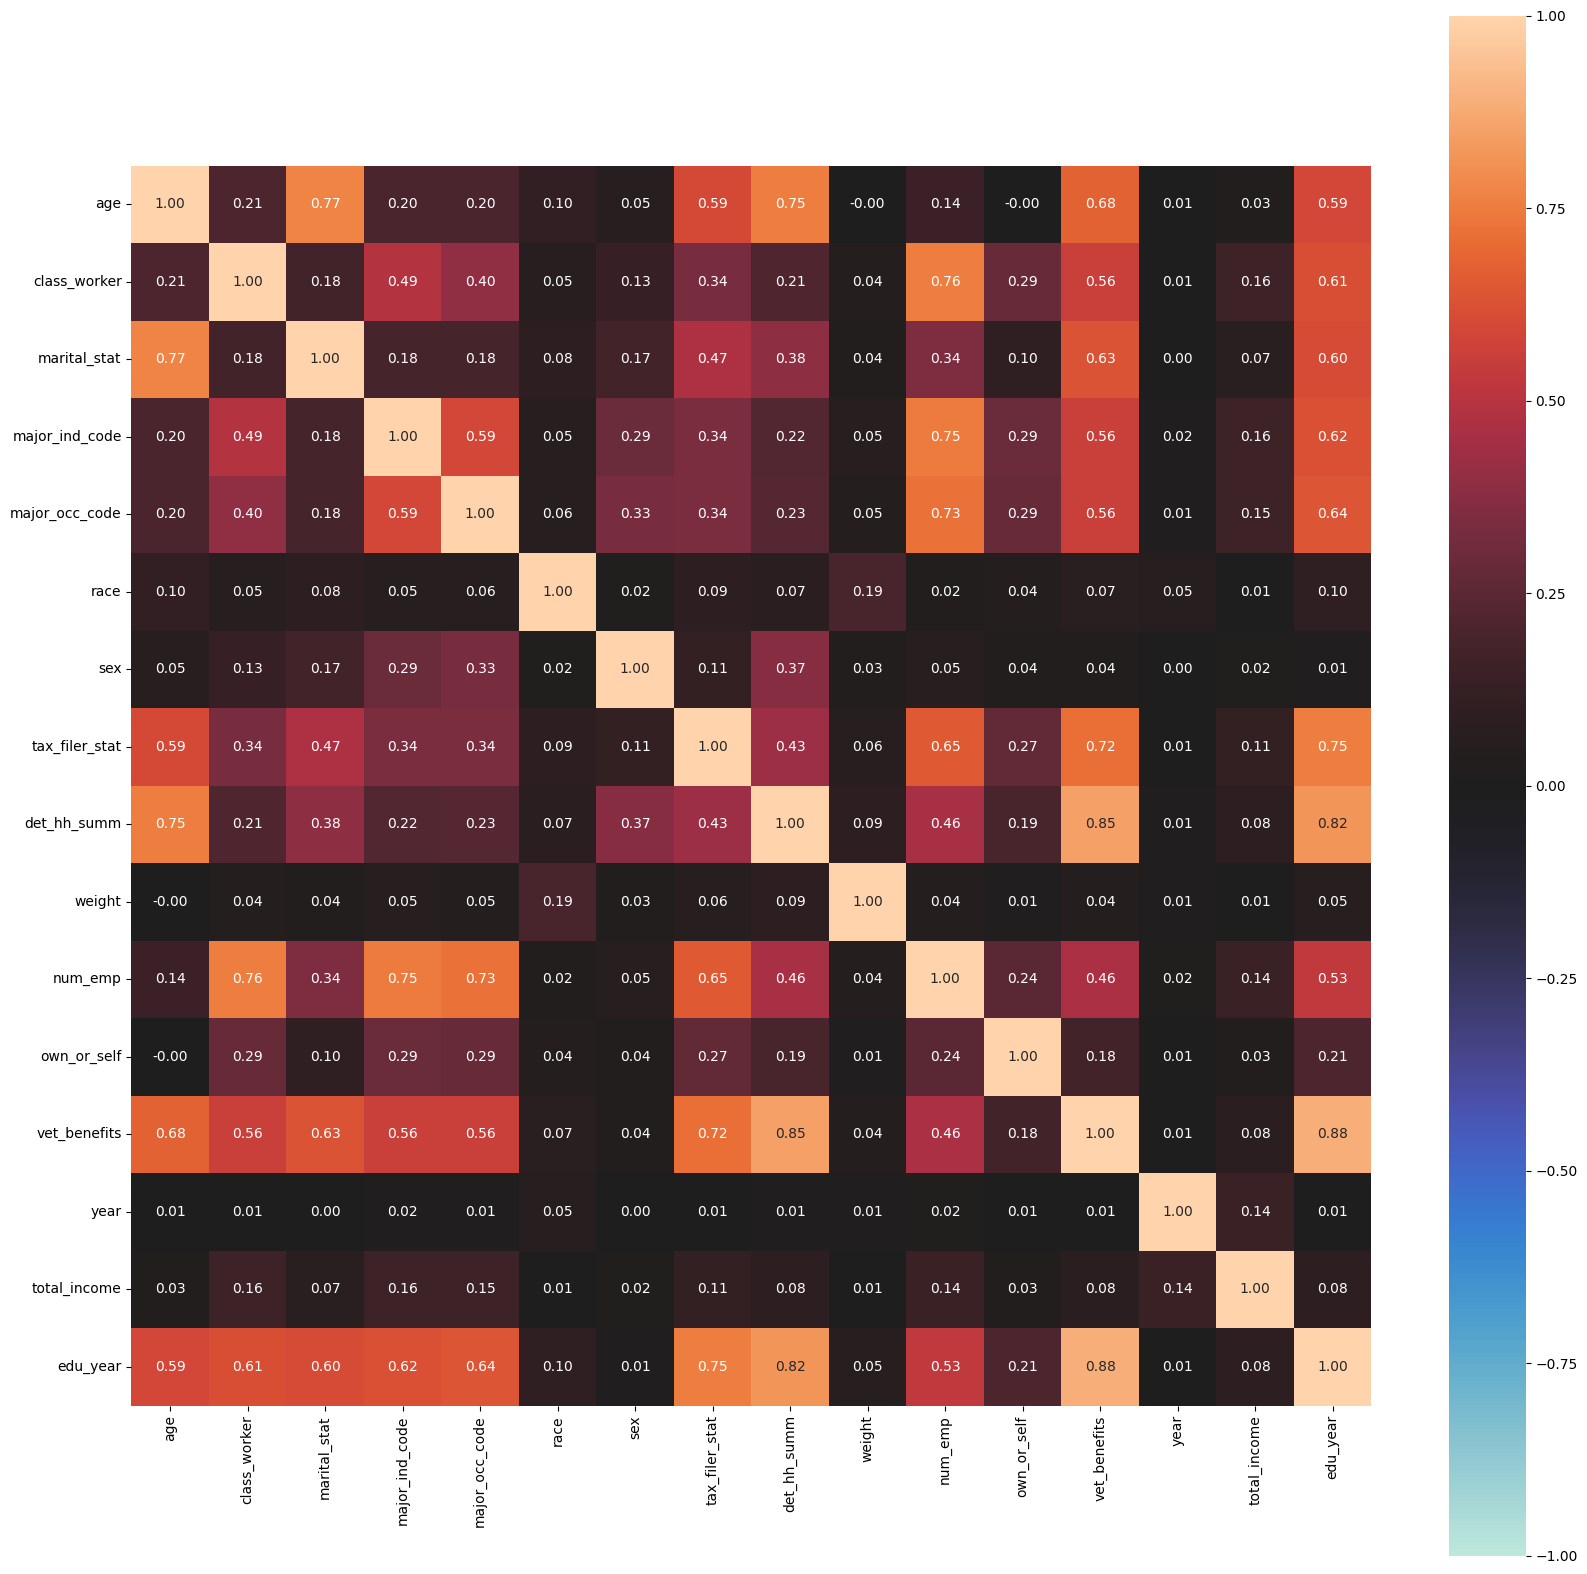

Original Feature Count: 16
Dropped 0 features: []
Remaining Feature Count: 16


In [308]:

#coorelation analysis to remove collinear features basdd on non wieghted correlation matrix
import numpy as np
from dython.nominal import associations

def remove_collinear_features(X, categorical_cols, threshold=0.90):
    
    # 1. Compute Association Matrix (Features only)
    print("Computing correlation matrix (this may take a moment)...")
    results = associations(
        X, 
        nominal_columns=categorical_cols,
        plot=True,  # Turn off plot for speed if not needed
        figsize=(20, 20),
    )
    # Handle dython return type (it usually returns a dict {'corr': ...})
    if isinstance(results, dict):
        corr_matrix = results['corr']
    else:
        corr_matrix = results
    # 2. Identify Collinear Features
    # Use absolute value because -0.99 is just as redundant as 0.99
    corr_abs = corr_matrix.abs()
    # Select upper triangle of correlation matrix (k=1 drops diagonal)
    upper_tri = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))    
    # Find columns where any correlation > threshold
    dropped_features = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    # 3. Drop Features
    X_reduced = X.drop(columns=dropped_features)
    print(f"Original Feature Count: {X.shape[1]}")
    print(f"Dropped {len(dropped_features)} features: {dropped_features}")
    print(f"Remaining Feature Count: {X_reduced.shape[1]}")    
    return X_reduced, dropped_features

# Run the function on X_train
X_train_clean, dropped_cols = remove_collinear_features(X_train, categorical_features, threshold=0.9)


In [309]:
X_test_clean = X_test.drop(columns=dropped_cols)

In [310]:
X_train_clean.columns

Index(['age', 'class_worker', 'marital_stat', 'major_ind_code',
       'major_occ_code', 'race', 'sex', 'tax_filer_stat', 'det_hh_summ',
       'weight', 'num_emp', 'own_or_self', 'vet_benefits', 'year',
       'total_income', 'edu_year'],
      dtype='object')

### Recursive feature Elimination

In [312]:
sum(y_train*w_train)/sum(w_train)

0.5

In [313]:
X_train_clean.drop(['weight'], axis=1, inplace=True)
X_train_clean

,age,class_worker,marital_stat,major_ind_code,major_occ_code,race,sex,tax_filer_stat,det_hh_summ,num_emp,own_or_self,vet_benefits,year,total_income,edu_year
19304,-1.381520,3,4,14,6,4,1,4,2,-0.844823,0,0,0,-0.139357,0.0
190135,-1.063874,3,4,14,6,4,0,4,2,-0.844823,0,0,1,-0.139357,0.0
103736,0.569734,3,6,14,6,4,0,4,4,-0.844823,0,2,1,-0.139357,16.0
111242,0.796624,4,2,19,7,4,0,2,7,-0.426056,0,2,1,-0.139357,12.0
41624,-1.063874,3,4,14,6,4,0,4,6,-0.844823,0,0,1,-0.139357,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15778,-1.563032,3,4,14,6,4,1,4,2,-0.844823,0,0,1,-0.139357,0.0
75089,1.840318,3,2,14,6,4,1,1,4,-0.844823,0,2,0,-0.139014,12.0
196308,0.660490,3,3,14,6,2,0,4,4,-0.844823,0,2,0,-0.139357,11.0
31906,-0.110936,3,2,14,6,3,0,2,7,-0.844823,0,2,0,-0.139357,14.0


Starting Recursive Feature Elimination with Weights...
Optimal number of features: 10
Best CV F1 Score: 0.2564


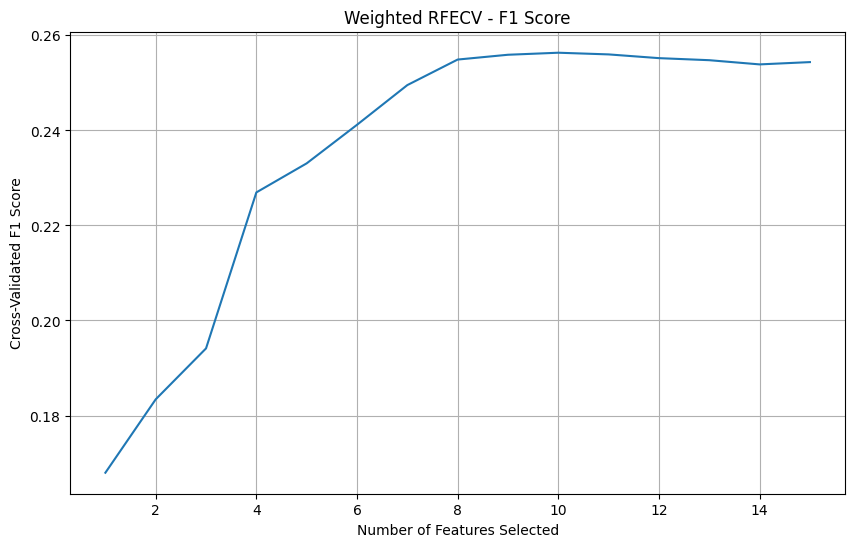

In [314]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# ---------------------------------------------------------
# GLOBAL CONFIG: Enable metadata routing (Critical for sklearn > 1.4)
# ---------------------------------------------------------
import sklearn
sklearn.set_config(enable_metadata_routing=True)

def perform_weighted_f1_feature_selection(X, y, weights):
    # 1. Define Estimator
    clf = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        max_features=10,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )
    
    # --- FIX START ---
    # Explicitly authorize 'sample_weight' for the fit method
    clf.set_fit_request(sample_weight=True)
    # --- FIX END ---

    # 2. Define Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # 3. Initialize RFECV
    rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=cv,
        scoring='f1',
        n_jobs=-1
    )

    print("Starting Recursive Feature Elimination with Weights...")
    
    # 4. Fit with Weights (Now authorized)
    rfecv.fit(X, y, sample_weight=weights)

    # 5. Results
    print(f"Optimal number of features: {rfecv.n_features_}")
    print(f"Best CV F1 Score: {max(rfecv.cv_results_['mean_test_score']):.4f}")

    # Feature Ranking
    feature_ranking = pd.DataFrame({
        'Feature': X.columns,
        'Selected': rfecv.support_,
        'Rank': rfecv.ranking_
    }).sort_values(by='Rank')

    # 6. Visualization
    plt.figure(figsize=(10, 6))
    plt.xlabel("Number of Features Selected")
    plt.ylabel("Cross-Validated F1 Score")
    plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
    plt.title("Weighted RFECV - F1 Score")
    plt.grid(True)
    plt.show()

    return feature_ranking[feature_ranking['Selected'] == True]['Feature'].tolist(), rfecv

# Usage:
selected_cols, selector = perform_weighted_f1_feature_selection(X_train_clean, y_train, weights=w_train)

In [315]:
selected_cols

['age',
 'class_worker',
 'major_ind_code',
 'major_occ_code',
 'tax_filer_stat',
 'sex',
 'num_emp',
 'det_hh_summ',
 'edu_year',
 'total_income']

In [54]:
selected_cols = ['age',
 'det_ind_code',
 'det_occ_code',
 'tax_filer_stat',
 'capital_gains',
 'stock_dividends',
 'full_or_part_emp',
 'sex',
 'weeks_worked',
 'fam_under_18',
 'num_emp',
 'edu_year',
 'det_hh_fam_stat']

In [316]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,f1_score,log_loss,confusion_matrix,classification_report,precision_score,recall_score

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, BaggingClassifier)
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (roc_curve, roc_auc_score, accuracy_score, f1_score, 
                             log_loss, confusion_matrix, classification_report, 
                             precision_score, recall_score)
classifier_lg = LogisticRegression(random_state=0 , max_iter=500)
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_nb = GaussianNB()
classifier_knn = KNeighborsClassifier()
classifier_bag = BaggingClassifier(random_state=0)
classifier_rf  = RandomForestClassifier(random_state=0)
classifier_boost = AdaBoostClassifier(random_state=0)
classifier_gboost = GradientBoostingClassifier(random_state=0)
classifier_xgb = XGBClassifier(random_state=0)
classifier_lbgm = LGBMClassifier(random_state=0)
classifier_cgb = CatBoostClassifier(random_state=0)
classifier_mlp = MLPClassifier(random_state=0, max_iter=500)



# SVC takes a long time to train, so we will skip it for now , could use linear SVC if needed

In [317]:
X_train_f = X_train_clean[selected_cols]
X_test_f = X_test_clean[selected_cols]

In [318]:
import pandas as pd
import sklearn
from sklearn.metrics import (roc_curve, roc_auc_score, accuracy_score, f1_score, 
                             log_loss, confusion_matrix, classification_report, 
                             precision_score, recall_score)

# 1. Disable Strict Routing (Fixes AdaBoost/Bagging Errors)
sklearn.set_config(enable_metadata_routing=False)

results_list = []

classifiers = [
    classifier_lg, classifier_dt, classifier_nb, classifier_knn, 
    classifier_bag, classifier_rf, classifier_boost,
    classifier_gboost, classifier_xgb, classifier_lbgm, classifier_cgb,
    classifier_mlp
]

for cls in classifiers:
    name = cls.__class__.__name__
    print(f"Training {name}...")
    
    # --- A. Fit with Universal Weight Logic ---
    try:
        # 1. Try Native Support First
        # Most sklearn models & XGB/LGBM/CatBoost support sample_weight
        # Note: GaussianNB DOES support weights in modern sklearn
        if name in ['KNeighborsClassifier', 'MLPClassifier']: 
            raise TypeError("Force resampling for models known to lack weight support")
            
        model = cls.fit(X_train_f, y_train, sample_weight=w_train)
        
    except (TypeError, ValueError) as e:
        # 2. Fallback: Resampling for models without weight support
        print(f"  -> {name} does not support weights directly. Resampling data...")
        
        # Combine X, y, w temporarily
        train_data = X_train_f.copy()
        train_data['target_temp'] = y_train
        
        # Sample with replacement, prob proportional to weights
        # We sample n_samples equal to original size to maintain scale
        train_resampled = train_data.sample(
            n=len(train_data), 
            weights=w_train, 
            replace=True, 
            random_state=42
        )
        
        X_res = train_resampled.drop('target_temp', axis=1)
        y_res = train_resampled['target_temp']
        
        # Fit on resampled data (Unweighted fit, but data is now effectively weighted)
        model = cls.fit(X_res, y_res)

    # --- B. Prediction ---
    y_proba = model.predict_proba(X_test_f)[:, 1]
    y_pred = model.predict(X_test_f)
    
    # --- C. Weighted Metrics (Critical step!) ---
    # Even if trained with resampling, we evaluate on the ORIGINAL test set using weights
    
    print(cls.__class__.__name__)
    print('Weighted Confusion Matrix:\n', confusion_matrix(y_test, y_pred, sample_weight=w_test))
    print('Weighted Classification Report:\n', classification_report(y_test, y_pred, sample_weight=w_test))
    print('='*80)
    
    # Calculate Metrics
    fpr, tpr, _ = roc_curve(y_test, y_proba, sample_weight=w_test)
    auc = roc_auc_score(y_test, y_proba, sample_weight=w_test)
    accuracy = accuracy_score(y_test, y_pred, sample_weight=w_test)
    f1score = f1_score(y_test, y_pred, sample_weight=w_test)
    logloss = log_loss(y_test, y_proba, sample_weight=w_test)
    cm = confusion_matrix(y_test, y_pred, sample_weight=w_test)
    precision = precision_score(y_test, y_pred, sample_weight=w_test)
    recall = recall_score(y_test, y_pred, sample_weight=w_test)
    
    # Append to List
    results_list.append({
        'classifiers': name,
        'fpr': fpr, 'tpr': tpr, 'Roc Auc': auc, 'Accuracy': accuracy,
        'f1 Score': f1score, 'logloss': logloss, 'Confusion Matrix': cm,
        'Precision': precision, 'Recall': recall
    })

# 3. Create DataFrame
result_table = pd.DataFrame(results_list)
result_table.set_index('classifiers', inplace=True)

# Display result sorted by F1 Score (usually best metric for this)
print(result_table)


Training LogisticRegression...
LogisticRegression
Weighted Confusion Matrix:
 [[3530125.13514139  905233.60546518]
 [ 620508.28       3862972.28000001]]
Weighted Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82 4435358.740606598
           1       0.81      0.86      0.84 4483480.5600000145

    accuracy                           0.83 8918839.300606612
   macro avg       0.83      0.83      0.83 8918839.300606612
weighted avg       0.83      0.83      0.83 8918839.300606612

Training DecisionTreeClassifier...
DecisionTreeClassifier
Weighted Confusion Matrix:
 [[4245020.71813096  190338.02247562]
 [2553156.56000001 1930324.        ]]
Weighted Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.96      0.76 4435358.740606598
           1       0.91      0.43      0.58 4483480.5600000145

    accuracy                           0.69 8918839.300606612
   macro 

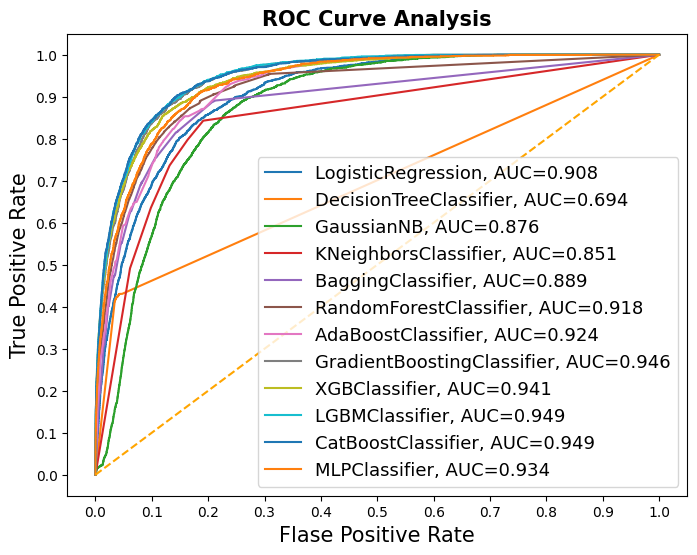

In [319]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['Roc Auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [320]:
result_table[['Roc Auc','Accuracy','f1 Score','logloss','Confusion Matrix','Precision','Recall']]

,Roc Auc,Accuracy,f1 Score,logloss,Confusion Matrix,Precision,Recall
classifiers,,,,,,,
LogisticRegression,0.907677,0.828930,0.835085,0.378599,"[[3530125.135141388, 905233.6054651847], [6205...",0.810152,0.861601
DecisionTreeClassifier,0.694155,0.692393,0.584580,10.933717,"[[4245020.718130956, 190338.02247562417], [255...",0.910246,0.430541
GaussianNB,0.876206,0.814830,0.828061,0.618030,"[[3290513.0958625367, 1144845.644744034], [506...",0.776470,0.886996
KNeighborsClassifier,0.851227,0.802061,0.789036,4.107876,"[[3852055.880024839, 583302.860581738], [11820...",0.849846,0.736347
BaggingClassifier,0.889406,0.752141,0.691878,2.423292,"[[4226289.117782247, 209069.62282434394], [200...",0.922308,0.553573
RandomForestClassifier,0.918275,0.686252,0.557614,1.444101,"[[4357014.091911875, 78344.64869471811], [2719...",0.957465,0.393346
AdaBoostClassifier,0.924377,0.844492,0.846592,0.514118,"[[3704906.9736152883, 730451.7669912841], [656...",0.839723,0.853574
GradientBoostingClassifier,0.946145,0.873389,0.877104,0.295664,"[[3760035.251906197, 675323.4887003679], [4538...",0.856464,0.898762
XGBClassifier,0.940952,0.867397,0.866528,0.324507,"[[3897125.920398494, 538232.8202080758], [6444...",0.877039,0.856265


Starting LightGBM Feature Elimination...
Optimal number of features: 15
Best CV F1 Score: 0.2667


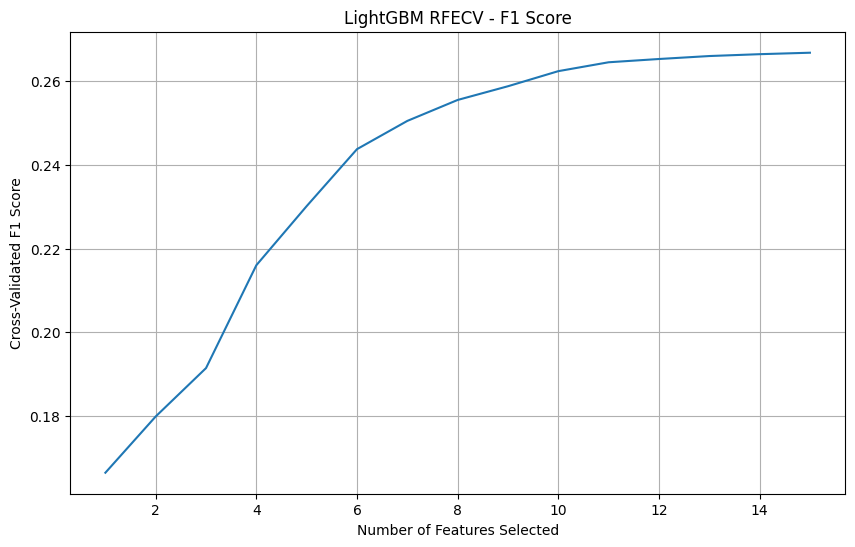

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import sklearn

# Global Config
sklearn.set_config(enable_metadata_routing=True)

def perform_lightgbm_f1_feature_selection(X, y, weights):
    """
    Performs feature selection using LightGBM (Faster & often more accurate).
    """
    
    # 1. Define Estimator
    # is_unbalance=True handles the class imbalance automatically
    # n_jobs=-1 uses all cores
    # importance_type='gain' is preferred for selection (shows contribution to loss reduction)
    clf = LGBMClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        is_unbalance=True, 
        importance_type='gain',
        verbose=-1 
    )
    
    # Explicitly opt-in for sample_weight
    clf.set_fit_request(sample_weight=True)

    # 2. Define Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # 3. Initialize RFECV
    rfecv = RFECV(
        estimator=clf,
        step=1, 
        cv=cv,
        scoring='f1',
        n_jobs=-1
    )

    print("Starting LightGBM Feature Elimination...")
    
    # 4. Fit
    # LightGBM handles sample_weight natively
    rfecv.fit(X, y, sample_weight=weights)

    # 5. Results
    print(f"Optimal number of features: {rfecv.n_features_}")
    print(f"Best CV F1 Score: {max(rfecv.cv_results_['mean_test_score']):.4f}")

    # Feature Ranking
    feature_ranking = pd.DataFrame({
        'Feature': X.columns,
        'Selected': rfecv.support_,
        'Rank': rfecv.ranking_
    }).sort_values(by='Rank')

    # 6. Visualization
    plt.figure(figsize=(10, 6))
    plt.xlabel("Number of Features Selected")
    plt.ylabel("Cross-Validated F1 Score")
    plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
    plt.title("LightGBM RFECV - F1 Score")
    plt.grid(True)
    plt.show()

    return feature_ranking[feature_ranking['Selected'] == True]['Feature'].tolist(), rfecv

selected_cols, selector = perform_lightgbm_f1_feature_selection(X_train_clean, y_train, weights=w_train)

In [322]:
importances = selector.estimator_.feature_importances_
importance_df = pd.DataFrame({
        'Feature': selected_cols,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

In [323]:
print("\nTop 10 Selected Features by Importance:")
print(importance_df.head(15))


Top 10 Selected Features by Importance:
           Feature    Importance
0              age  1.538764e+08
1         edu_year  5.683106e+07
2     total_income  4.361294e+07
3          num_emp  2.883007e+07
4              sex  2.055807e+07
5   major_occ_code  1.815408e+07
6   tax_filer_stat  1.167938e+07
7      det_hh_summ  1.163953e+07
8     class_worker  9.863290e+06
9   major_ind_code  9.487445e+06
10    marital_stat  3.784651e+06
11            race  3.068313e+06
12            year  2.407780e+06
13     own_or_self  2.375520e+06
14    vet_benefits  3.641645e+05


In [327]:
selected_cols = importance_df['Feature'].tolist()[:15]

In [328]:
selected_cols

['age',
 'edu_year',
 'total_income',
 'num_emp',
 'sex',
 'major_occ_code',
 'tax_filer_stat',
 'det_hh_summ',
 'class_worker',
 'major_ind_code',
 'marital_stat',
 'race',
 'year',
 'own_or_self',
 'vet_benefits']

In [ ]:
# selected_features =['age', 'class_worker', 'det_ind_code', 'det_occ_code', 'marital_stat',
#        'sex', 'full_or_part_emp', 'capital_gains', 'capital_losses',
#        'stock_dividends', 'tax_filer_stat', 'det_hh_fam_stat', 'mig_same',
#        'num_emp', 'country_mother', 'weeks_worked', 'edu_year']

In [329]:
X_train_f = X_train_clean[selected_cols]
X_test_f = X_test_clean[selected_cols]

In [330]:
X_train_f

,age,edu_year,total_income,num_emp,sex,major_occ_code,tax_filer_stat,det_hh_summ,class_worker,major_ind_code,marital_stat,race,year,own_or_self,vet_benefits
19304,-1.381520,0.0,-0.139357,-0.844823,1,6,4,2,3,14,4,4,0,0,0
190135,-1.063874,0.0,-0.139357,-0.844823,0,6,4,2,3,14,4,4,1,0,0
103736,0.569734,16.0,-0.139357,-0.844823,0,6,4,4,3,14,6,4,1,0,2
111242,0.796624,12.0,-0.139357,-0.426056,0,7,2,7,4,19,2,4,1,0,2
41624,-1.063874,0.0,-0.139357,-0.844823,0,6,4,6,3,14,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15778,-1.563032,0.0,-0.139357,-0.844823,1,6,4,2,3,14,4,4,1,0,0
75089,1.840318,12.0,-0.139014,-0.844823,1,6,1,4,3,14,2,4,0,0,2
196308,0.660490,11.0,-0.139357,-0.844823,0,6,4,4,3,14,3,2,0,0,2
31906,-0.110936,14.0,-0.139357,-0.844823,0,6,2,7,3,14,2,3,0,0,2


In [331]:
X_test_f

,age,edu_year,total_income,num_emp,sex,major_occ_code,tax_filer_stat,det_hh_summ,class_worker,major_ind_code,marital_stat,race,year,own_or_self,vet_benefits
96828,-1.154630,0.0,-0.139357,-0.844823,0,6,4,2,3,14,4,0,0,0,0
29328,0.887380,14.0,-0.134681,1.667779,0,0,2,4,1,5,2,4,1,0,2
30351,-0.746228,14.0,-0.139357,-0.426056,1,2,5,0,7,5,4,4,1,0,2
152474,-0.292448,12.0,-0.137301,-0.426056,1,2,2,7,5,19,2,4,1,0,2
143717,0.206710,16.0,-0.139357,1.667779,0,2,5,6,1,18,4,4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21967,0.569734,16.0,-0.139357,1.667779,0,2,5,4,4,10,0,4,1,0,2
76670,0.297466,12.0,-0.139357,-0.426056,1,8,2,4,4,21,2,4,1,0,2
46983,0.796624,12.0,-0.139353,-0.426056,0,3,2,7,6,0,2,4,0,0,2
112266,0.206710,7.5,-0.139357,-0.844823,0,6,2,7,3,14,2,3,1,0,2


In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,f1_score,log_loss,confusion_matrix,classification_report,precision_score,recall_score

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, BaggingClassifier)
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (roc_curve, roc_auc_score, accuracy_score, f1_score, 
                             log_loss, confusion_matrix, classification_report, 
                             precision_score, recall_score)
classifier_lg = LogisticRegression(random_state=0 , max_iter=500)
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_nb = GaussianNB()
classifier_knn = KNeighborsClassifier()
classifier_bag = BaggingClassifier(random_state=0)
classifier_rf  = RandomForestClassifier(random_state=0)
classifier_boost = AdaBoostClassifier(random_state=0)
classifier_gboost = GradientBoostingClassifier(random_state=0)
classifier_xgb = XGBClassifier(random_state=0)
classifier_lbgm = LGBMClassifier(random_state=0)
classifier_cgb = CatBoostClassifier(random_state=0)
classifier_mlp = MLPClassifier(random_state=0, max_iter=500)



# SVC takes a long time to train, so we will skip it for now , could use linear SVC if needed

In [333]:
import pandas as pd
import sklearn
from sklearn.metrics import (roc_curve, roc_auc_score, accuracy_score, f1_score, 
                             log_loss, confusion_matrix, classification_report, 
                             precision_score, recall_score)

# 1. Disable Strict Routing (Fixes AdaBoost/Bagging Errors)
sklearn.set_config(enable_metadata_routing=False)

results_list = []

classifiers = [
    classifier_lg, classifier_dt, classifier_nb, classifier_knn, 
    classifier_bag, classifier_rf, classifier_boost,
    classifier_gboost, classifier_xgb, classifier_lbgm, classifier_cgb,
    classifier_mlp
]

for cls in classifiers:
    name = cls.__class__.__name__
    print(f"Training {name}...")
    
    # --- A. Fit with Universal Weight Logic ---
    try:
        # 1. Try Native Support First
        # Most sklearn models & XGB/LGBM/CatBoost support sample_weight
        # Note: GaussianNB DOES support weights in modern sklearn
        if name in ['KNeighborsClassifier', 'MLPClassifier']: 
            raise TypeError("Force resampling for models known to lack weight support")
            
        model = cls.fit(X_train_f, y_train, sample_weight=w_train)
        
    except (TypeError, ValueError) as e:
        # 2. Fallback: Resampling for models without weight support
        print(f"  -> {name} does not support weights directly. Resampling data...")
        
        # Combine X, y, w temporarily
        train_data = X_train_f.copy()
        train_data['target_temp'] = y_train
        
        # Sample with replacement, prob proportional to weights
        # We sample n_samples equal to original size to maintain scale
        train_resampled = train_data.sample(
            n=len(train_data), 
            weights=w_train, 
            replace=True, 
            random_state=42
        )
        
        X_res = train_resampled.drop('target_temp', axis=1)
        y_res = train_resampled['target_temp']
        
        # Fit on resampled data (Unweighted fit, but data is now effectively weighted)
        model = cls.fit(X_res, y_res)

    # --- B. Prediction ---
    y_proba = model.predict_proba(X_test_f)[:, 1]
    y_pred = model.predict(X_test_f)
    
    # --- C. Weighted Metrics (Critical step!) ---
    # Even if trained with resampling, we evaluate on the ORIGINAL test set using weights
    
    print(cls.__class__.__name__)
    print('Weighted Confusion Matrix:\n', confusion_matrix(y_test, y_pred, sample_weight=w_test))
    print('Weighted Classification Report:\n', classification_report(y_test, y_pred, sample_weight=w_test))
    print('='*80)
    
    # Calculate Metrics
    fpr, tpr, _ = roc_curve(y_test, y_proba, sample_weight=w_test)
    auc = roc_auc_score(y_test, y_proba, sample_weight=w_test)
    accuracy = accuracy_score(y_test, y_pred, sample_weight=w_test)
    f1score = f1_score(y_test, y_pred, sample_weight=w_test)
    logloss = log_loss(y_test, y_proba, sample_weight=w_test)
    cm = confusion_matrix(y_test, y_pred, sample_weight=w_test)
    precision = precision_score(y_test, y_pred, sample_weight=w_test)
    recall = recall_score(y_test, y_pred, sample_weight=w_test)
    
    # Append to List
    results_list.append({
        'classifiers': name,
        'fpr': fpr, 'tpr': tpr, 'Roc Auc': auc, 'Accuracy': accuracy,
        'f1 Score': f1score, 'logloss': logloss, 'Confusion Matrix': cm,
        'Precision': precision, 'Recall': recall
    })

# 3. Create DataFrame
result_table = pd.DataFrame(results_list)
result_table.set_index('classifiers', inplace=True)

# Display result sorted by F1 Score (usually best metric for this)
print(result_table)


Training LogisticRegression...
LogisticRegression
Weighted Confusion Matrix:
 [[3540559.47829921  894799.26230737]
 [ 615117.92       3868362.64000002]]
Weighted Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82 4435358.740606598
           1       0.81      0.86      0.84 4483480.5600000145

    accuracy                           0.83 8918839.300606612
   macro avg       0.83      0.83      0.83 8918839.300606612
weighted avg       0.83      0.83      0.83 8918839.300606612

Training DecisionTreeClassifier...
DecisionTreeClassifier
Weighted Confusion Matrix:
 [[4266881.1251539   168477.61545269]
 [2560272.50000001 1923208.06      ]]
Weighted Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.96      0.76 4435358.740606598
           1       0.92      0.43      0.58 4483480.5600000145

    accuracy                           0.69 8918839.300606612
   macro 

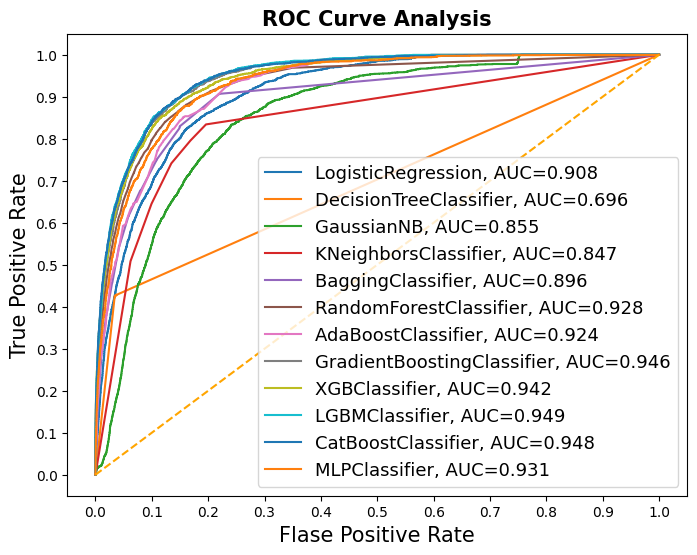

In [334]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['Roc Auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [335]:
result_table[['Roc Auc','Accuracy','f1 Score','logloss','Confusion Matrix','Precision','Recall']]

,Roc Auc,Accuracy,f1 Score,logloss,Confusion Matrix,Precision,Recall
classifiers,,,,,,,
LogisticRegression,0.908402,0.830705,0.836706,0.377242,"[[3540559.4782992066, 894799.262307372], [6151...",0.812142,0.862803
DecisionTreeClassifier,0.696077,0.694046,0.584991,10.961576,"[[4266881.125153903, 168477.61545269113], [256...",0.919454,0.428954
GaussianNB,0.855078,0.766970,0.798522,1.160587,"[[2721902.1030364214, 1713456.6375701516], [36...",0.706199,0.918613
KNeighborsClassifier,0.847398,0.803030,0.790972,4.275505,"[[3838302.801426848, 597055.939179726], [11596...",0.847723,0.741343
BaggingClassifier,0.896244,0.749884,0.686368,2.123522,"[[4247160.46177175, 188198.27883483336], [2042...",0.928418,0.544429
RandomForestClassifier,0.928305,0.676933,0.534607,1.193723,"[[4382503.573112535, 52855.16749405353], [2828...",0.969051,0.369122
AdaBoostClassifier,0.924377,0.844492,0.846592,0.514118,"[[3704906.9736152883, 730451.7669912841], [656...",0.839723,0.853574
GradientBoostingClassifier,0.946192,0.875162,0.879127,0.295756,"[[3756419.8403027514, 678938.9003038126], [434...",0.856399,0.903095
XGBClassifier,0.942456,0.867678,0.866476,0.319531,"[[3909502.9152761805, 525855.8253303878], [654...",0.879253,0.854065


# Segmentations

In [344]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [345]:
data_df

,age,class_worker,marital_stat,major_ind_code,major_occ_code,race,sex,tax_filer_stat,det_hh_summ,weight,num_emp,own_or_self,vet_benefits,year,income_50k,total_income,edu_year
0,73,Not in universe,Widowed,Not in universe or children,Not in universe,White,Female,Nonfiler,Other relative of householder,1700.09,0,0,2,95,0,0.0,12.0
1,58,Self-employed-not incorporated,Divorced,Construction,Precision production craft & repair,White,Male,Head of household,Householder,1053.55,1,0,2,94,0,0.0,14.0
2,18,Not in universe,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,Female,Nonfiler,Child 18 or older,991.95,0,0,2,95,0,0.0,10.0
3,9,Not in universe,Never married,Not in universe or children,Not in universe,White,Female,Nonfiler,Child under 18 never married,1758.14,0,0,0,94,0,0.0,0.0
4,10,Not in universe,Never married,Not in universe or children,Not in universe,White,Female,Nonfiler,Child under 18 never married,1069.16,0,0,0,94,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,Male,Joint both 65+,Householder,955.27,0,0,2,95,0,0.0,7.5
199519,65,Self-employed-incorporated,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,Male,Joint one under 65 & one 65+,Householder,687.19,1,0,2,94,0,6427.0,11.0
199520,47,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,Male,Joint both under 65,Householder,1923.03,6,0,2,95,0,157.0,14.0
199521,16,Not in universe,Never married,Not in universe or children,Not in universe,White,Female,Nonfiler,Child under 18 never married,4664.87,0,0,2,95,0,0.0,10.0


In [ ]:
X_train_clean['income_50k'] = y_train
X_train_clean

,age,class_worker,marital_stat,major_ind_code,major_occ_code,race,sex,tax_filer_stat,det_hh_summ,num_emp,own_or_self,vet_benefits,year,total_income,edu_year,income_50k
19304,-1.381520,3,4,14,6,4,1,4,2,-0.844823,0,0,0,-0.139357,0.0,0
190135,-1.063874,3,4,14,6,4,0,4,2,-0.844823,0,0,1,-0.139357,0.0,0
103736,0.569734,3,6,14,6,4,0,4,4,-0.844823,0,2,1,-0.139357,16.0,0
111242,0.796624,4,2,19,7,4,0,2,7,-0.426056,0,2,1,-0.139357,12.0,0
41624,-1.063874,3,4,14,6,4,0,4,6,-0.844823,0,0,1,-0.139357,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15778,-1.563032,3,4,14,6,4,1,4,2,-0.844823,0,0,1,-0.139357,0.0,0
75089,1.840318,3,2,14,6,4,1,1,4,-0.844823,0,2,0,-0.139014,12.0,0
196308,0.660490,3,3,14,6,2,0,4,4,-0.844823,0,2,0,-0.139357,11.0,0
31906,-0.110936,3,2,14,6,3,0,2,7,-0.844823,0,2,0,-0.139357,14.0,0


In [350]:
norm_w_train = (w_train - min(w_train))/(max(w_train) - min(w_train))

In [363]:
X_train_resampled = X_train_clean.sample(
    n=int(sum(norm_w_train))*50, 
    weights=norm_w_train, 
    replace=True, 
    random_state=42
)

In [364]:
X_train_resampled['income_50k'].value_counts()

income_50k
1    104829
0    103321
Name: count, dtype: int64

In [365]:
X_train_resampled.shape

(208150, 16)

In [366]:
numeric_cols

['age', 'num_emp', 'total_income']

In [367]:
# K - means clustering on numerical features
numerical_features_for_clustering = [
    'age', 'num_emp' , 'edu_year', 'total_income' , 'income_50k']

In [369]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler2 = StandardScaler()

# Fit and transform the 'edu_year' column
# reshape(-1, 1) is required because scaler expects a 2D array for a single feature
X_train_resampled['edu_year'] = scaler2.fit_transform(X_train_resampled[['edu_year']])
# Display the first few rows to verify the scaling


,age,num_emp,edu_year,total_income,income_50k
81276,-0.156314,0.411478,0.251639,-0.139357,0
15706,0.206710,-0.426056,0.608702,-0.139357,1
175160,0.297466,1.667779,0.965765,-0.141998,1
37738,-1.063874,-0.844823,-2.247804,-0.139357,0
73592,0.615112,1.667779,0.251639,-0.139357,0
...,...,...,...,...,...
177158,-0.746228,-0.426056,-0.283956,-0.139357,0
157347,1.704184,1.667779,0.251639,-0.130141,0
191031,0.887380,-0.844823,0.608702,-0.099606,1
141658,0.252088,1.667779,0.608702,-0.139357,1


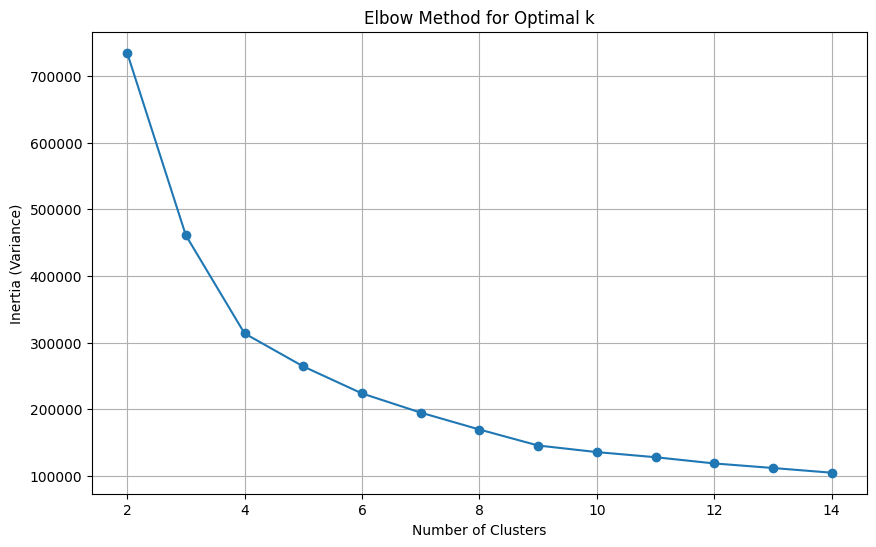

In [370]:
X_segment_num_train = X_train_resampled[numerical_features_for_clustering].copy()
inertia = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_segment_num_train)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Variance)')
plt.grid(True)
plt.show()


k=2: Silhouette Score = 0.7850
k=3: Silhouette Score = 0.4824
k=4: Silhouette Score = 0.4287
k=5: Silhouette Score = 0.4348
k=6: Silhouette Score = 0.4094
k=7: Silhouette Score = 0.4090
k=8: Silhouette Score = 0.4008
k=9: Silhouette Score = 0.4021
k=10: Silhouette Score = 0.3890
k=11: Silhouette Score = 0.3669
k=12: Silhouette Score = 0.3478
k=13: Silhouette Score = 0.3548
k=14: Silhouette Score = 0.3630


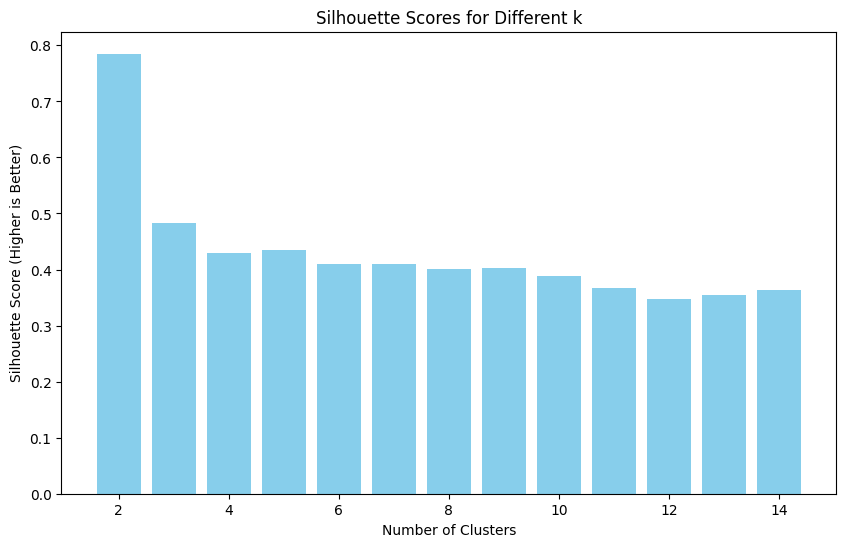

Best k according to Silhouette: 2


In [372]:
from sklearn.metrics import silhouette_score


silhouette_scores = []
# Use a sample for speed (e.g., 100,000 rows), or use full X_segment_num_train if < 20k rows
sample_size = 50000 
if len(X_segment_num_train) > sample_size:
    indices = np.random.choice(len(X_segment_num_train), sample_size, replace=False)
    X_sample = X_segment_num_train.iloc[indices] 
else:
    X_sample = X_segment_num_train
K_range = range(2, 15)  # Check k=2 to k=7

for k in K_range:
    # We must re-fit on the sample to get labels for the sample
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_sample)
    
    # Calculate score
    score = silhouette_score(X_sample, labels_temp)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.bar(K_range, silhouette_scores, color='skyblue')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score (Higher is Better)')
plt.show()

# Select k with the highest score
best_k_sil = K_range[np.argmax(silhouette_scores)]
print(f"Best k according to Silhouette: {best_k_sil}")


In [373]:
# considering k = 6 as optimal from elbow and silhouette methods
k_optimal = 3
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_segment_num_train)

# Add Cluster Labels to original data for interpretation
X_segment_num_train['Cluster'] = clusters

# 5. Cluster Interpretation (Marketing Profiles)
# Calculate mean values for each cluster to understand "who" they are
cluster_summary = X_segment_num_train.groupby('Cluster').mean()

# Add size of each cluster
cluster_summary['Count'] = X_segment_num_train['Cluster'].value_counts()
cluster_summary['Percent'] = (cluster_summary['Count'] / len(X_segment_num_train)) * 100

print("\n--- Marketing Segmentation Profiles ---")
print(cluster_summary.round(2).T)


--- Marketing Segmentation Profiles ---
Cluster              0          1        2
age              -1.03       0.50     0.37
num_emp          -0.81       0.62     1.20
edu_year         -1.89       0.36     0.30
total_income     -0.14      -0.08    10.82
income_50k        0.00       0.60     0.68
Count         33532.00  171898.00  2720.00
Percent          16.11      82.58     1.31


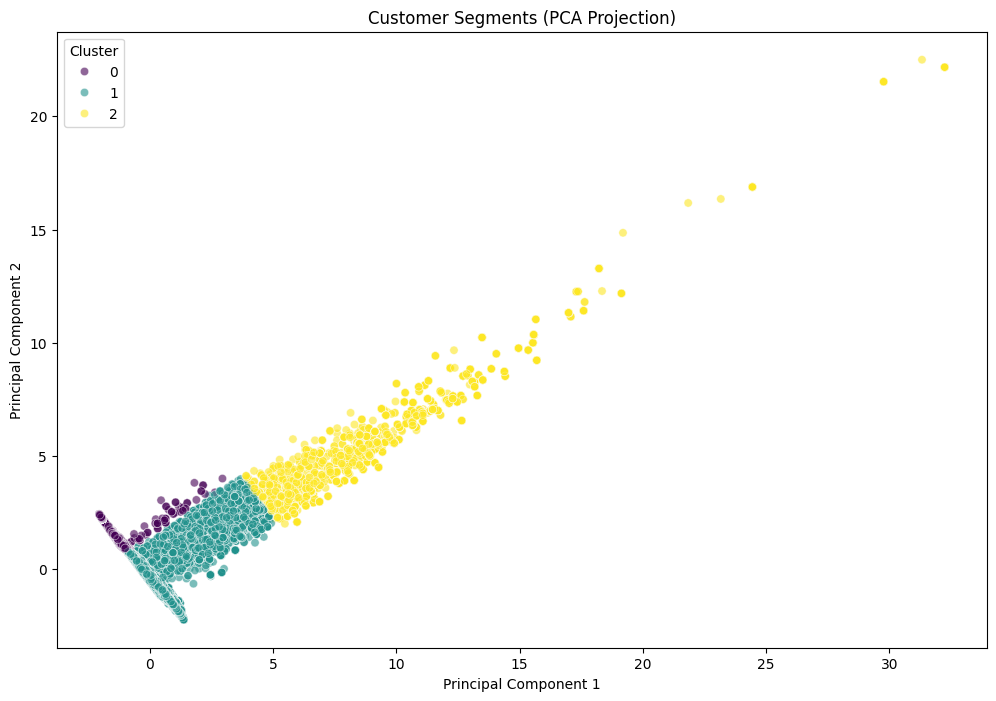

In [376]:
# 6. Visualization (PCA 2D Projection)
# Reduce to 2 dimensions just for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_segment_num_train)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', alpha=0.6)
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [377]:

# Calculate % of High Earners per Cluster
income_breakdown = X_segment_num_train.groupby('Cluster')['income_50k'].mean() * 100
print("\nPercentage of High Earners (>50k) by Cluster:")
print(income_breakdown)


Percentage of High Earners (>50k) by Cluster:
Cluster
0     0.274365
1    59.847119
2    68.419118
Name: income_50k, dtype: float64
